# CS4168 - Group Project

Group members:
- Italo Terto da Silva (ID: 21326312 )
- Szymon Szulc (ID: 21323208 )
- Boris Bobylkov (ID: 21317097 )
- Craig Phayer (ID: 21340633 )
- Martynas Danys (ID: 21315884 )

All group members contributed equally to the project. 20% of the contribution will be given to each member.

Import Libraries

In [2]:
# imports

## EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Clustering
from sklearn import manifold, preprocessing, cluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, MaxAbsScaler, Normalizer
import warnings

warnings.simplefilter("ignore")
pd.set_option('future.no_silent_downcasting', True)

## Exploratory Data Analysis

Perform exploratory data analysis of the dataset. Comment on your observations.

In [21]:
df = pd.read_csv('tracks.csv')

In [22]:
df.head(10)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.1660,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.1460,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.3490,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.1970,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.2190,123.983,4,club
5,58,214634,False,0.714,0.690,8,-5.356,1,0.0875,0.01370,0.000012,0.1300,0.6310,123.037,4,club
6,49,185142,False,0.774,0.870,6,-5.954,0,0.0646,0.03180,0.907000,0.1070,0.0461,105.010,4,club
7,55,199200,False,0.561,0.547,5,-5.345,0,0.0825,0.06220,0.874000,0.1490,0.2020,99.982,4,club
8,48,203773,False,0.665,0.984,0,-5.202,1,0.1150,0.00758,0.776000,0.3260,0.0392,106.013,4,club
9,52,170500,False,0.432,0.624,10,-6.731,0,0.0930,0.05090,0.019200,0.1810,0.2620,123.074,5,club


In [9]:
df.tail(10)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1490,24,695090,False,0.472,0.8340,5,-7.190,1,0.0495,0.0293,0.000514,0.6960,0.1420,90.032,4,opera
1491,23,99600,False,0.545,0.3690,2,-14.929,1,0.2340,0.9520,0.071200,0.8430,0.3330,85.539,1,opera
1492,22,209826,False,0.582,0.4500,11,-6.552,0,0.0270,0.4660,0.000000,0.0670,0.5790,91.840,4,opera
1493,23,178013,False,0.233,0.2120,5,-16.530,1,0.0572,0.9430,0.001730,0.1170,0.0359,168.273,4,opera
1494,23,283919,False,0.171,0.0289,8,-25.732,1,0.0566,0.9830,0.010600,0.0732,0.0381,180.967,4,opera
1495,23,352371,False,0.273,0.1220,0,-22.173,0,0.0575,0.9600,0.003330,0.0635,0.0731,117.718,4,opera
1496,22,204310,False,0.457,0.4980,6,-8.387,1,0.0368,0.7660,0.000002,0.2890,0.2020,116.255,4,opera
1497,23,225506,False,0.241,0.2070,1,-16.353,1,0.0374,0.9820,0.002260,0.1140,0.0735,86.885,1,opera
1498,23,148600,False,0.280,0.2080,5,-20.158,1,0.0521,0.9410,0.000200,0.4100,0.2410,90.477,4,opera
1499,23,257800,False,0.244,0.2050,3,-15.596,1,0.0367,0.9840,0.329000,0.0788,0.0750,71.370,4,opera


In [10]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,28.554000,209746.921333,0.541069,0.594378,5.043333,-8.312037,0.654000,0.077477,0.347930,0.166602,0.194847,0.378548,116.924497,3.880000
std,24.038587,67423.126723,0.206632,0.261282,3.522744,5.552970,0.475852,0.080272,0.376654,0.310986,0.167316,0.246329,28.885636,0.466632
min,0.000000,40266.000000,0.060100,0.005680,0.000000,-39.219000,0.000000,0.024400,0.000003,0.000000,0.028200,0.024700,51.096000,0.000000
25%,1.000000,173061.000000,0.381000,0.397750,2.000000,-9.887750,0.000000,0.036300,0.024600,0.000000,0.096900,0.167000,95.244750,4.000000
50%,25.000000,203506.000000,0.572500,0.647500,5.000000,-6.458500,1.000000,0.046400,0.143000,0.000117,0.127000,0.338500,115.082000,4.000000
75%,47.000000,238861.500000,0.695000,0.813000,8.000000,-4.723500,1.000000,0.076000,0.756000,0.090775,0.224250,0.575500,132.016500,4.000000
max,93.000000,879905.000000,0.957000,0.996000,11.000000,0.366000,1.000000,0.859000,0.996000,0.983000,0.987000,0.965000,213.928000,5.000000


In [11]:
df.isnull().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### What are the average audio feature profiles of more popular vs. less popular tracks?

To answer this, we will compare key audio features like **danceability**, **energy**, **valence** etc on popular tracks vs unpopular tracks. (When comparing popularity we will perform binary classification of the popularity column so that for m, the median: 0 for popularity ≤ m and 1 for popularity > m.)

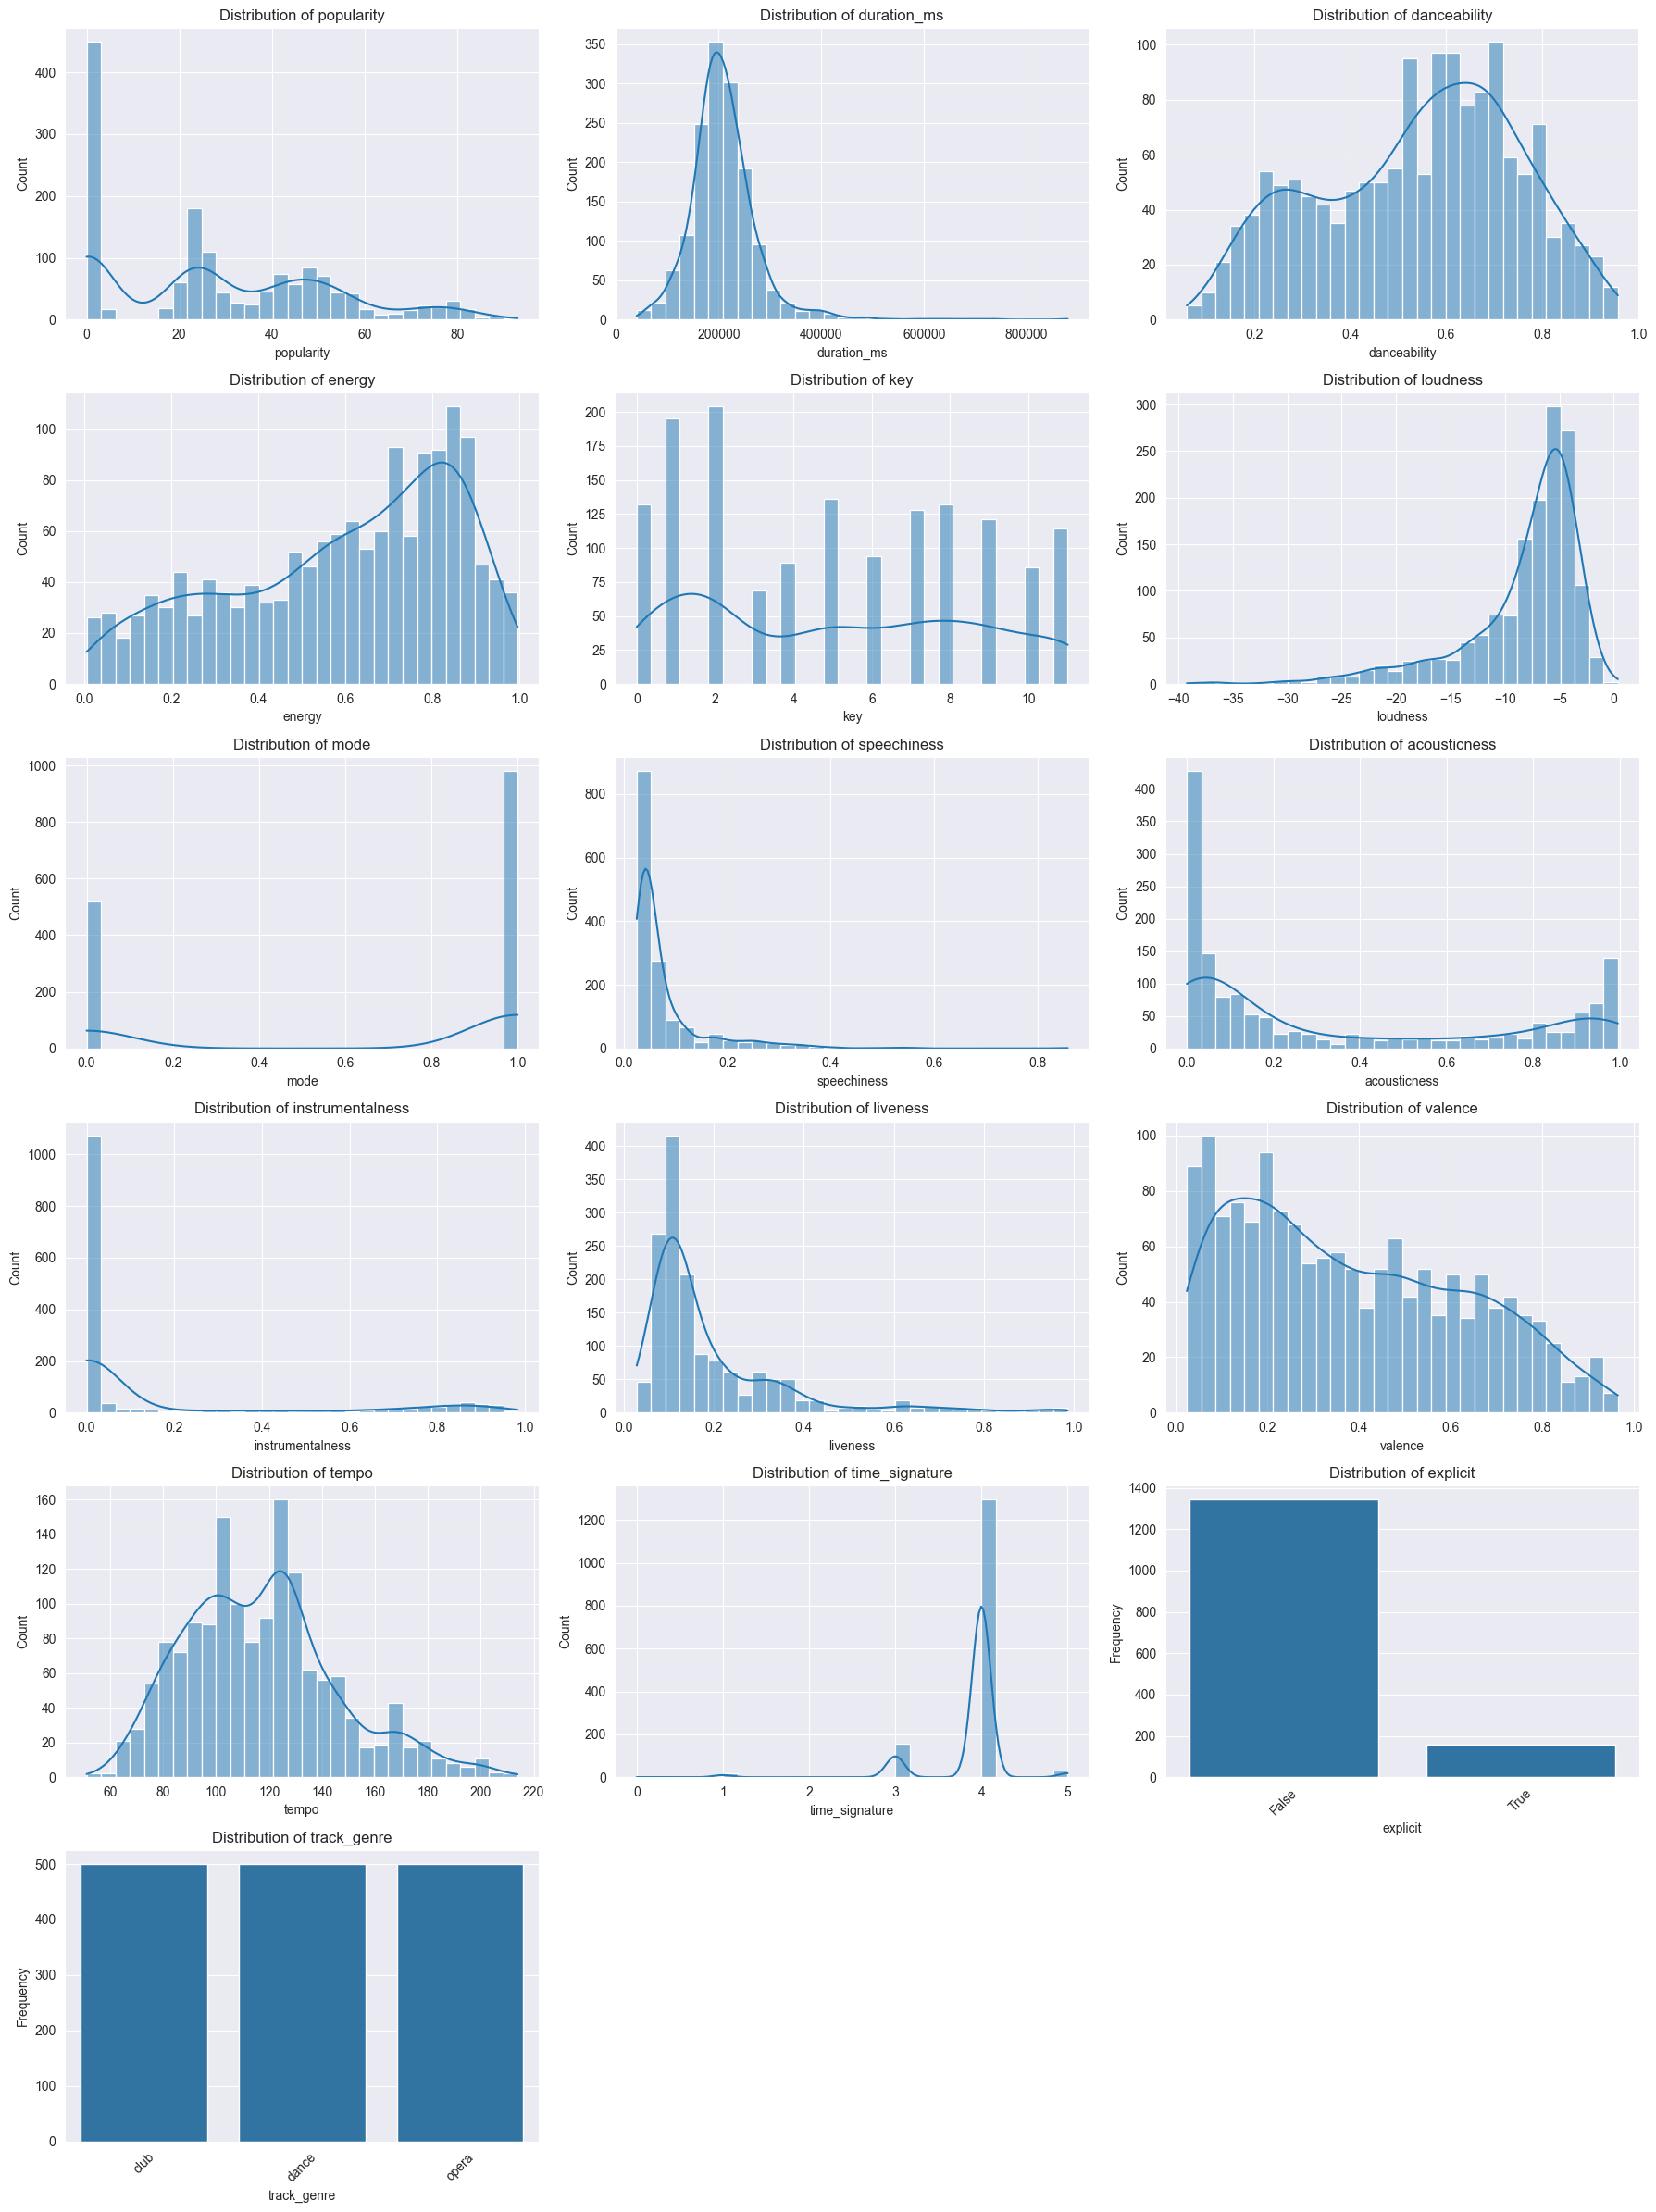

In [12]:
# General overview of the dataset

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['bool', 'object']).columns

# Total number of subplots
all_cols = list(numeric_cols) + list(categorical_cols)
total_plots = len(all_cols)
cols = 3
rows = (total_plots + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(all_cols):
    if col in numeric_cols:
        sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
        axes[i].set_ylabel("Count")
    else:
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_ylabel("Frequency")
        axes[i].tick_params(axis='x', rotation=45)

    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

for j in range(len(all_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [13]:
num_tracks, num_features = df.shape
print(f"Total number of tracks: {num_tracks}")
print(f"Number of features: {num_features}")

# Separate columns by dtype
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

binary_cols = [col for col in df.columns if df[col].nunique() == 2]

print(f"Numerical features ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")
print(f"Boolean features ({len(bool_cols)}): {bool_cols}")
print(f"Binary features ({len(binary_cols)}): {binary_cols}")

Total number of tracks: 1500
Number of features: 16
Numerical features (14): ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
Categorical features (1): ['track_genre']
Boolean features (1): ['explicit']
Binary features (2): ['explicit', 'mode']


#### General overview of dataset features

- There are 1500 tracks total in the dataset with 16 different feature as seen in the graphs above
- The dataset contains the following features: (from [huggingface](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset))
    - **Numerical Features (14)**
  These are continuous or discrete numerical variables, many ranging from 0 to 1 (normalized audio features), and others representing musical scales or timing:
  - `popularity`: Integer from 0–100; reflects how frequently and recently a track is played. Popularity is right-skewed meaning most tracks are not very popular and only a small amount reach high popularity scores.
  - `duration_ms`: Track length in milliseconds.
  - `danceability`: A value from 0.0–1.0 indicating how suitable a track is for dancing. The distribution is fairly balanced but with a slight left-skew. It suggests that most tracks are danceable and may correlate with higher popularity.
  - `energy`: A measure of intensity and activity (0.0–1.0). The energy distribution is fairly balanced but with a slight left-skew meaning there are more energetic tracks. These tracks are more likely to be more popular.
  - `key`: Integer from 0 to 11; corresponds to musical keys (0 = C, 1 = C♯/D♭, etc.). It has a fairly even distribution with no clear dominant key.
  - `loudness`: Loudness in decibels (dB), typically negative values. The graph is very left-skewed, meaning most tracks are mixed loud (around the -5 Db mark). It could show that louder tracks that are mastered well are more popular.
  - `mode`: Binary numeric (0 = minor, 1 = major). Has a very strong bias towards 1 (major key, more melodic). May relate to popular music's tendency to be more upbeat.
  - `speechiness`: Detects presence of spoken words (0.0–1.0). It is Right-skewed, with a sharp drop after 0.1. Most tracks have low speech content, possibly meaning speech-heavy tracks are niche.
  - `acousticness`: Confidence a track is acoustic (0.0–1.0). The graph is somewhat bimodal but with majority of tracks having a low confidence (value of 0 for +~400 tracks) i.e there is very little inbetween, the track is either very acoustic or not at all. This may separate genres or track types and possibly affecting popularity.
  - `instrumentalness`: Likelihood a track contains no vocals (0.0–1.0). The graph shows a large majority of tracks are not instrumental (0.0) with a small amount being fully instrumental (1.0). This may suggest vocals contribute to popularity.
  - `liveness`: Probability the track was performed live (0.0–1.0). It is mostly right-skewed. Live performance tracks are much less common and could have an effect on genre type.
  - `valence`: Musical positivity (0.0 = sad, 1.0 = happy). Shows a wide spread (but still right-skewed) with peaks near ~0.05 and 0.2. Valence may show weaker direct correlation, but it's worth comparing by popularity later.
  - `tempo`: Estimated beats per minute (BPM). Has a somewhat normal distribution with peaks around 100-130 bpm which is the range for most popular music (music with more listeners). Suggests that the mainstream tempo is more popular in making tracks in hopes for more engagement.
  - `time_signature`: Estimated time signature (integer between 3 and 7). Most if not all tracks are in the 4/4 time signature (4 beats per measure). This is the most common time signature which is very standard. It doesn't give any strong signal for reading popularity of a track/genre.

- **Categorical Features (1)**
  - `track_genre`: The genre of the track (e.g., club, dance, opera). Genres are evenly balanced which is important in training classifiers.

- **Boolean Features (1)**
  - `explicit`: Indicates whether a track has explicit content (`True`/`False`). Majority of tracks don't have explicit content (this may relate to how many tracks have vocals at all) but a number of tracks do have explicit content so it depends on the genre e.g Hip-Hop and could show that
    1. Explicit tracks are more popular.
    2. What genres are more popular.

- **Binary Features (2)**
  - `explicit`: Already described above.
  - `mode`: Although numeric, it is binary and represents a categorical distinction (major or minor mode).

In [14]:
# Create popularity_binary based on the median

median_popularity = df['popularity'].median()
df['popularity_binary'] = (df['popularity'] > median_popularity).astype(int)

df['popularity_binary'].value_counts()

popularity_binary
0    784
1    716
Name: count, dtype: int64

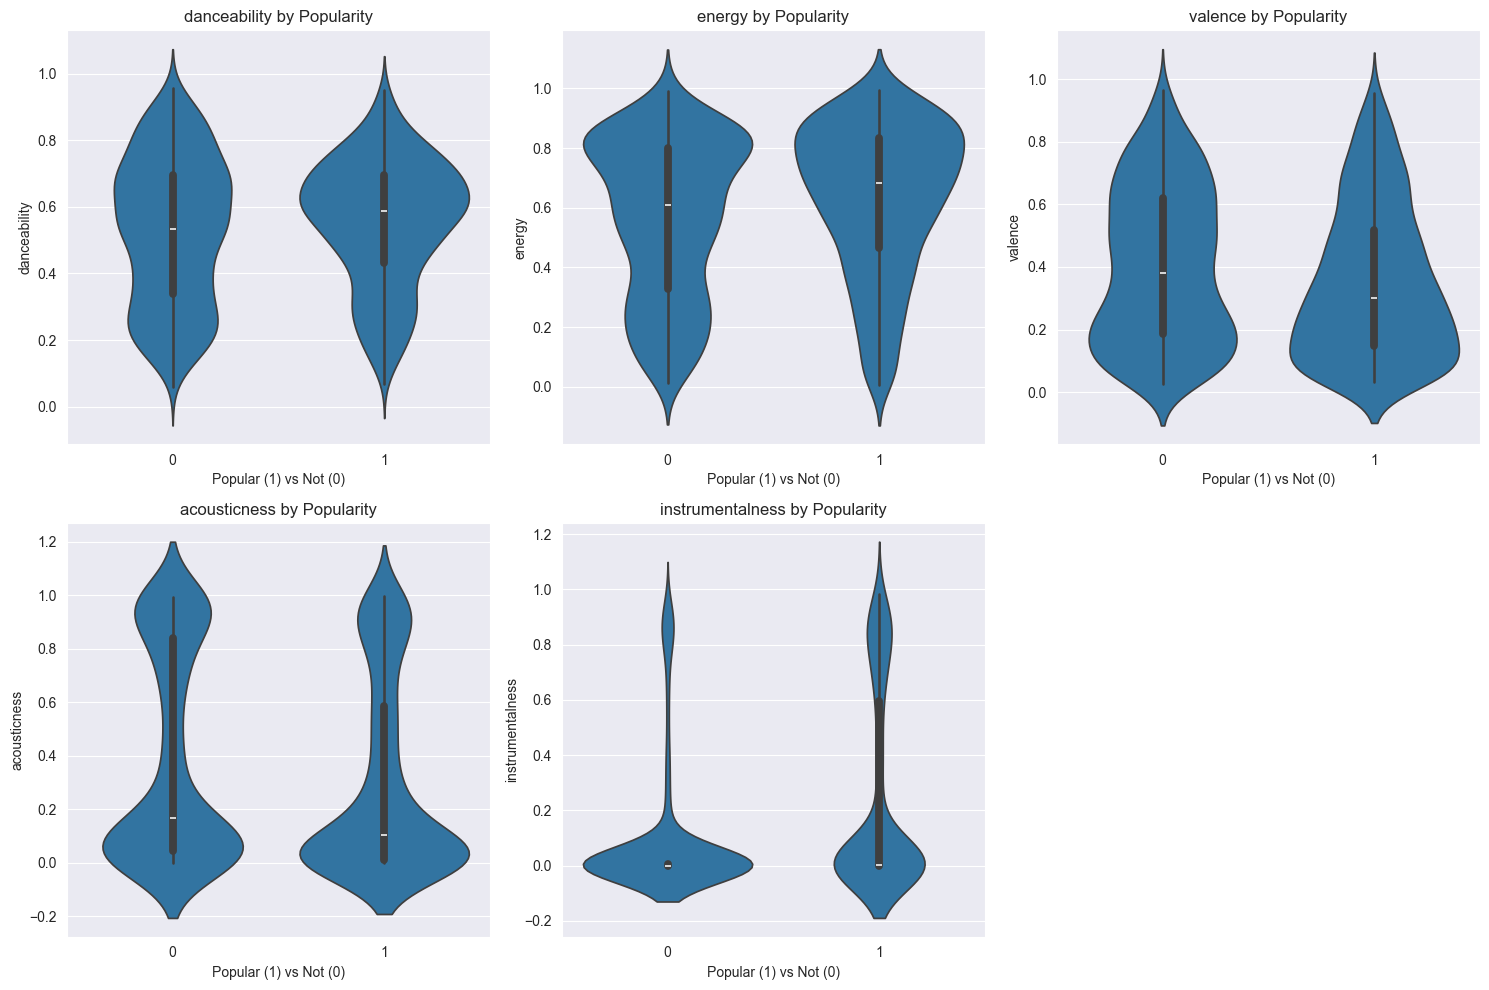

In [15]:
# Visualize the distribution of audio features by popularity

features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='popularity_binary', y=feature, data=df)
    plt.title(f"{feature} by Popularity")
    plt.xlabel("Popular (1) vs Not (0)")
plt.tight_layout()
plt.show()

#### Violin Plots

- The violin plots show the distribution of audio features for popular (1) and not popular (0) tracks.

##### **Danceability**

- Popular tracks show a slightly higher median danceability compared to not popular tracks.
- The distribution is wider for popular tracks and peak around **0.6 - 0.8** implying that popular tracks tend to be more danceable.
- Unpopular songs show a consistent spread of danceable tracks but no peak like popular tracks. This could just represent that there is also a large number of tracks are unpopular for other reasons than danceability.

##### **Energy**

- The energy distribution is very similar for both groups.
- Popular songs are slightly more clustered towards higher energy levels **(0.7 to 0.9)**.
- Unpopular songs also peak at arou8nd the same point but trail off much harder towards the higher energy levels.
- There is also much more songs at the lower energy levels that are unpopular compared to popular songs, helping us imply that popular songs tend to be more energetic and upbeat.

##### **Valence**

- The valence distribution is again similar for both groups.
- Majority of songs present in the dataset are around **0.2 - 0.4** for both groups which doesn't give us much to correlate with popularity, but what we can take away from this plot is that **there is much more songs that are unpopular with higher valence (happier) than popular songs with high valence.**

##### **Acousticness**

- Both distributions seem to be very wide spread, with songs either being very acoustic or not at all as mentioned before.
- Grouping by popularity here doesn't show us much correlation with popularity.
- Further insight is needed here as the acousticness could depend on other elements within the dataset such as genre, explicitness or some of the other features listed before.

##### **Instrumentalness**

- Majority of tracks in the dataset are not instrumental with most tracks around the **0.1** area and smaller numbers at the higher levels.
- However, there’s a **small peak in the popular group** toward the higher end (0.8+),
 indicating that some instrumental tracks are still capable of being popular, but further analysis is needed to explain these values.



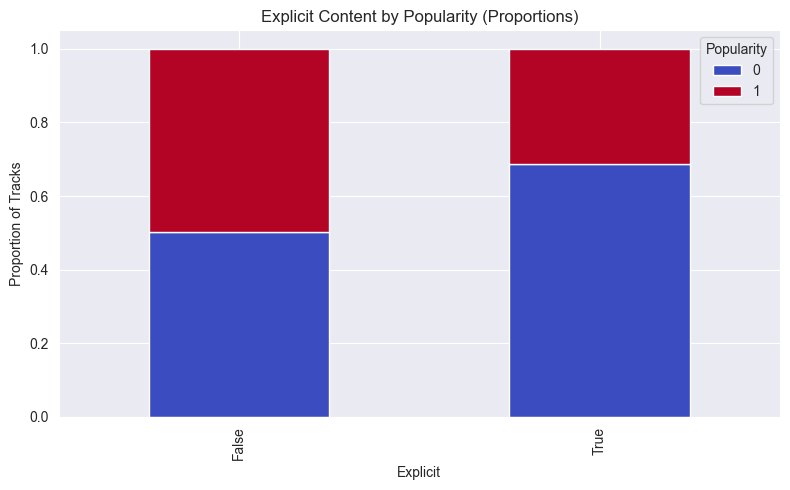

In [16]:
explicit_popularity = df.groupby(['explicit', 'popularity_binary']).size().unstack(fill_value=0)
explicit_normalized = explicit_popularity.div(explicit_popularity.sum(axis=1), axis=0)

explicit_normalized.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title("Explicit Content by Popularity (Proportions)")
plt.xlabel("Explicit")
plt.ylabel("Proportion of Tracks")
plt.legend(title='Popularity')
plt.tight_layout()
plt.show()

#### Explicit Content by Popularity

- The majority of tracks in the dataset are not explicit, but out of those that are explicit, they are less likely to be popular.
- This might be due to genre — explicit content may align with niche styles that don't appeal to tracks used in this dataset.
- Tracks with less/no explicit content do appeal to a broader audience as anyone can listen to them and can be more suitable to be played in more places.

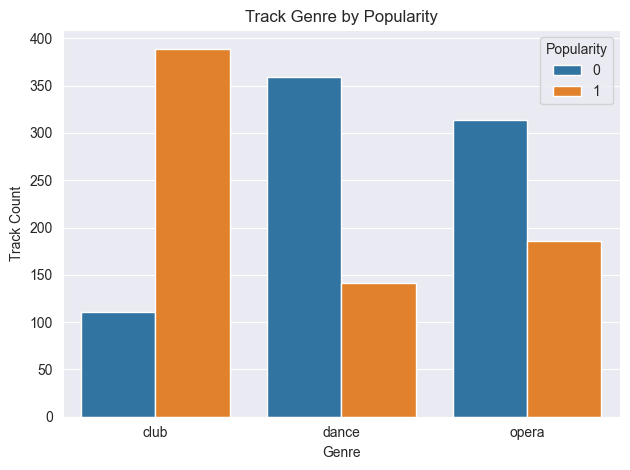

In [17]:
sns.countplot(x='track_genre', hue='popularity_binary', data=df)
plt.title("Track Genre by Popularity")
plt.xlabel("Genre")
plt.ylabel("Track Count")
plt.legend(title='Popularity')
plt.tight_layout()
plt.show()

#### Track Genre by Popularity

- Club tracks dominate the popularity distribution, with the largest number of popular tracks by far.
- Dance tracks flip the pattern — many more are not popular
- Opera tracks show a similar pattern although not has high number of unpopular tracks and a decent number of popular tracks.

We will look into the features of popular club tracks and unpopular dance/opera tracks to there average profile features as they contain the highest number of each.

#### Popular Club Tracks

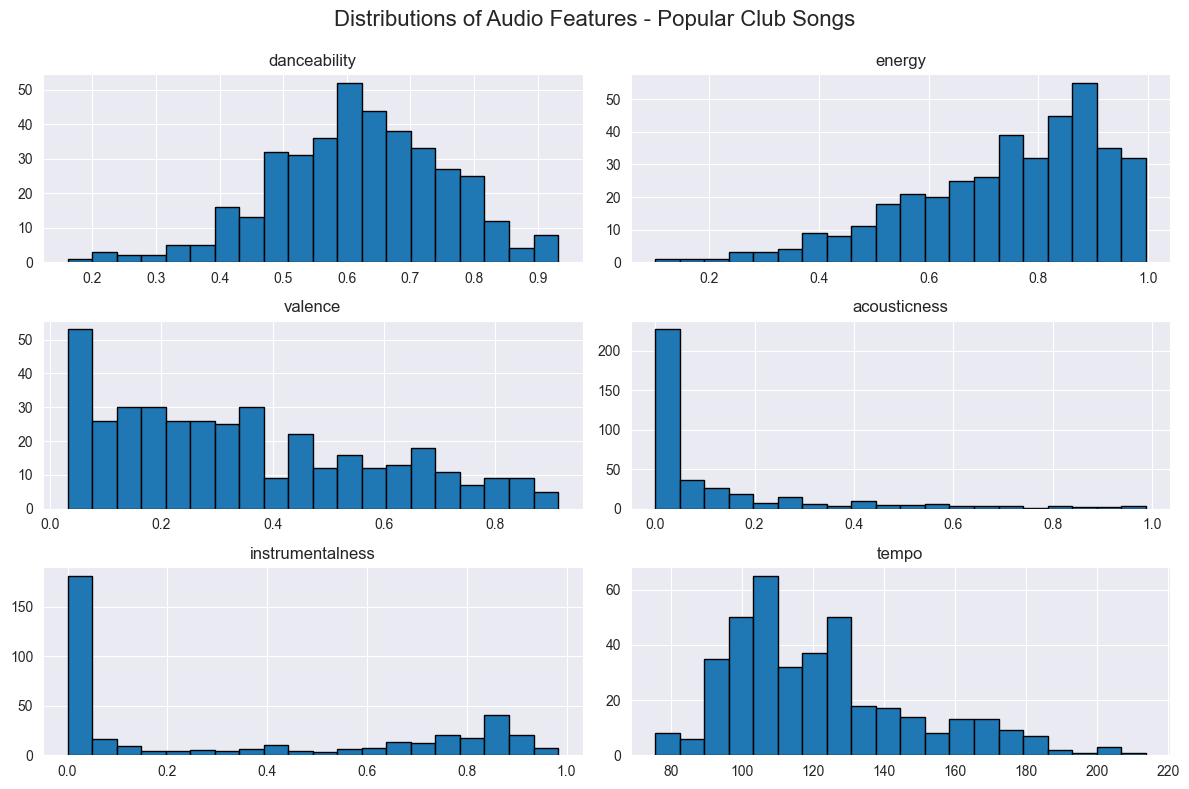

In [18]:
popular_club = df[(df['popularity_binary'] == 1) & (df['track_genre'] == 'club')]

features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'tempo']

popular_club[features].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distributions of Audio Features - Popular Club Songs", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

#### Positive Club Tracks

##### **Danceability**

- Most tracks fall between **0.5 and 0.8**, peaking around **0.6–0.7**, which makes sense fro club tracks to be danced to.

##### **Energy**

- The plot is very right-skewed with most tracks being energetic **(0.7+)**.

##### **Valence**

- this plot is a bit more distributed with a peak at **0.0**.

##### **Acousticness**

- extremely right skewed with most tracks being not acoustic at all **(0.0)**

##### **Instrumentalness**

- Most tracks are near 0.0, meaning they contain vocals.

##### **Tempo**

- Most songs fall between 100–130 BPM


Popular songs tend to be more danceable, energetic, non-acoustic, with low valence.



#### Unpopular Dance Tracks

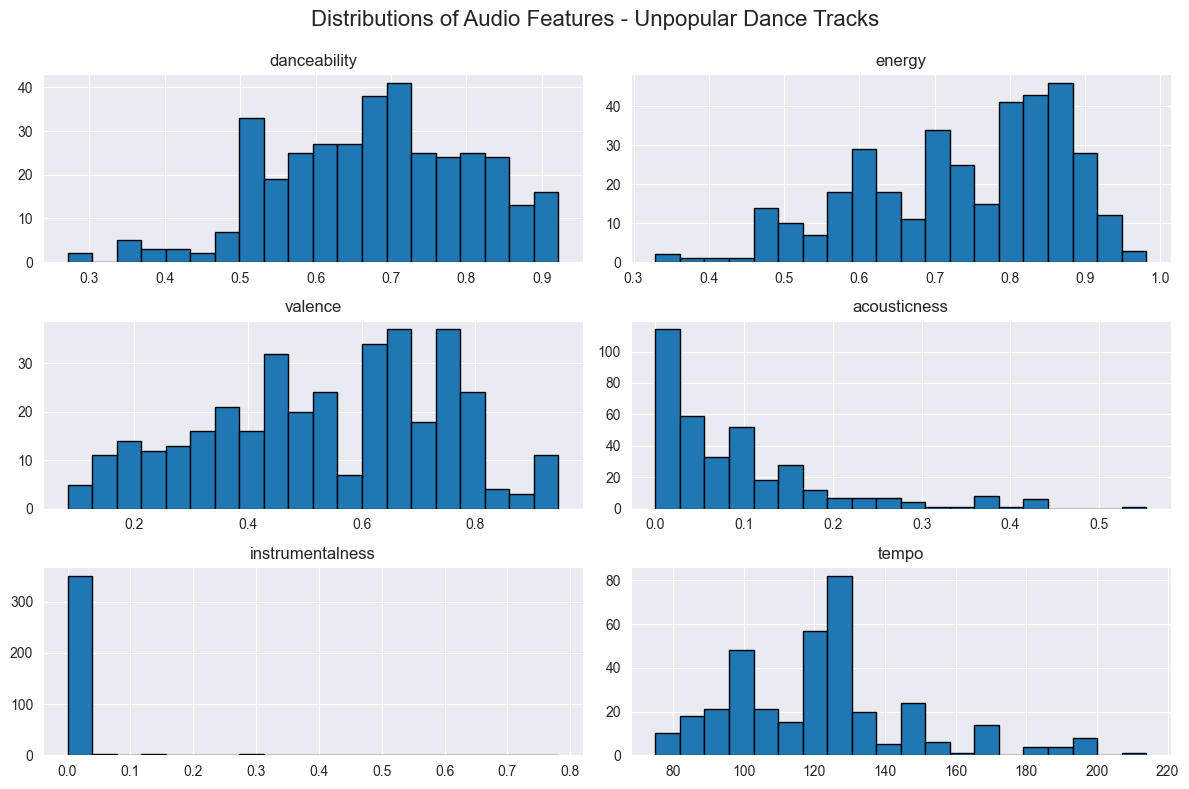

In [19]:
unpopular_dance = df[(df['popularity_binary'] == 0) & (df['track_genre'] == 'dance')]

unpopular_dance[features].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distributions of Audio Features - Unpopular Dance Tracks", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

##### Danceability

- Most tracks fall into the upper half of the scale **(0.5+)** with a peak around **0.7**.
- This means the lack of danceability is likely not the main reason for their unpopularity.

##### Energy
- The energy distribution is similar to the popular club tracks.
- many tracks lie between **0.7 and 0.9**.
- Contains a number of tracks with less energy than popular club tracks.

##### Valence
- Slightly left-skewed with most tracks being around **0.6-0.7**.
- Unpopular tracks are more likely to be happier.

##### Acousticness

- Mostly right-skewed but with much more of a tail than the popular club tracks and with majority of tracks in the dataset being non-acoustic, this could be a reason for their unpopularity.

##### Instrumentalness

- Just about all tracks are non-instrumental like seen in the dataset overview before but popular club tracks had more of a tail and a cluster around **0.8**. Very possible reason for their unpopularity.

##### Tempo

- Tempo is dispersed between **90-140 BPM** with a peak around **120 BPM**
- More tracks are a bit more dispersed around slower and much faster tempos than the popular club tracks.

Unpopular tracks are still danceable (most songs in the dataset are which could explain this) but can be less energetic, more acoustic, higher valence, and less instrumental. they could be seen to have a much wider range of tempos also.

#### Unpopular Opera Tracks

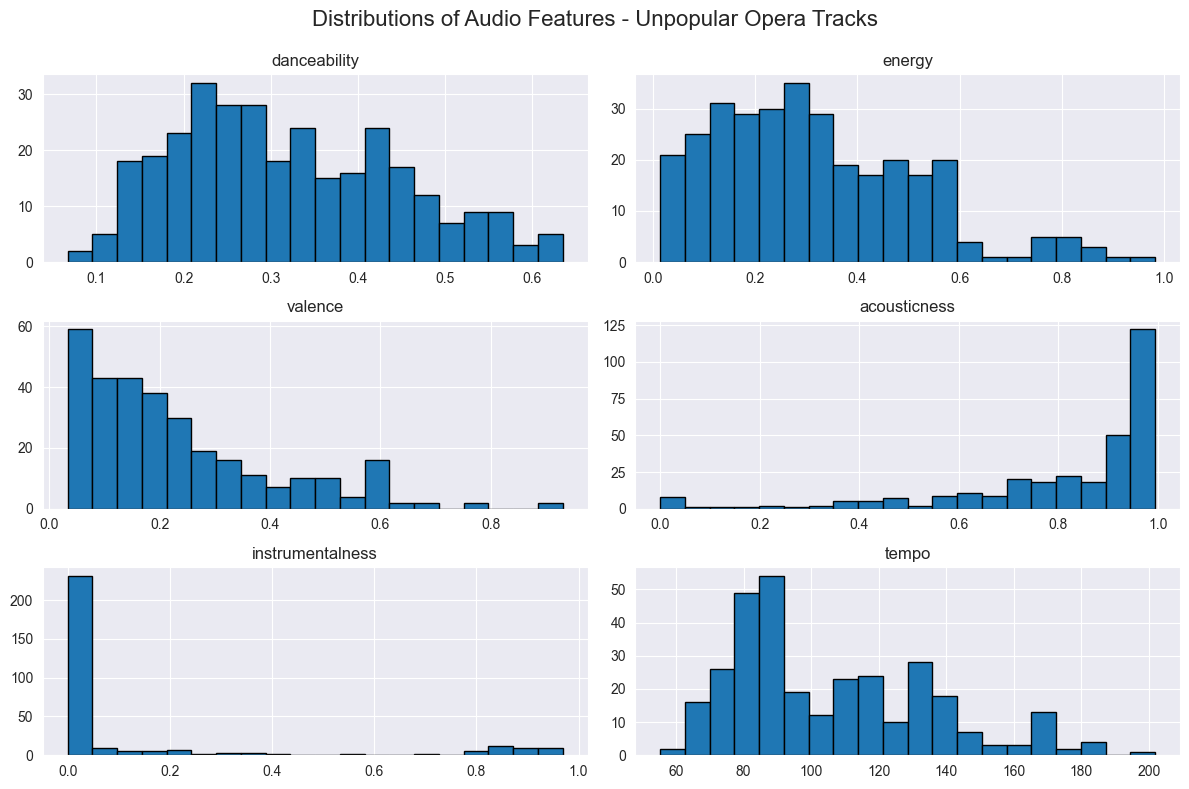

In [20]:
unpopular_opera = df[(df['popularity_binary'] == 0) & (df['track_genre'] == 'opera')]

unpopular_opera[features].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distributions of Audio Features - Unpopular Opera Tracks", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

##### Danceability

- Mostly low, concentrated between **0.2–0.4**, which is expected for the opera genre and significantly lower than club or dance music.

##### Energy
- Right-skewed, with a peak between **0.2–0.4** - showing that most tracks are soft or slow-paced.

##### Valence
- Right-skewed again with a peak around **0.0**, meaning most songs have a **sad or serious tone**.

##### Acousticness

- Extremely left-skewed with majority of tracks being acoustic **(1.0)**, unlike both club and dance tracks.

##### Instrumentalness

- Almost all tracks are **non-instrumental**, though opera often includes vocals as part of the performance. There are few tracks approaching higher instrumental values.

##### Tempo

- Centered around **80–100 BPM**, much slower than typical club music (which peaks at 120–130 BPM).

Unpopular tracks are slow, acoustic, low-energy, and not very danceable.


### Conclusion

**Popular tracks** are generally more **danceable**, have **higher energy**, and are **less acoustic**. They tend to follow a consistent **tempo around 120 BPM**, and often contain vocals with **low instrumentalness**.

**Unpopular tracks** vary more but often have **lower energy and danceability**, and are more likely to be **acoustic**. Some also have **higher valence** (happier mood). Tempo can be more spread out, and tracks in genres like opera tend to be **slower and less upbeat**.

## Cluster Analysis

In [ ]:
dataset = pd.read_csv('tracks.csv')

### Data normalisation:
• Popularity: get the median, popularity ? 0 : 1 based on the median

• Duration: Normalising

• Danceability: Normalise to get rid of spikes

• Energy: Normalise to get rid of spikes

• Key: categorical -> One-Hot encoding

• Loudness: Normalisation to get rid of left skew

• Speechiness: Normalise to get rid of skew

• Acousticness: Normalise

• Instrumentalness: Normalise

• Liveness: Normalise

• Valence: Normalise skew

• Tempo: Normalise spike

• Time Signature: categorical -> One-Hot encoding

• Track_genre: drop da shit

----------------------------

duration_ms: Normalize (Min-Max or Standard Scaling).

explicit: Convert boolean to integer (True → 1, False → 0).

danceability to valence (all float columns): These are already in [0,1] or close — check distribution, but usually safe to leave as is or use Standard Scaler for algorithms sensitive to variance.

key, mode, time_signature: These are categorical integers. Use one-hot encoding or leave as-is if using tree-based models.

loudness, tempo: These are floats, usually benefit from standard scaling.


In [188]:
pop_mean = dataset['popularity'].median()
dataset['popular'] = (dataset['popularity'] >= pop_mean).astype(int)
dataset.drop(columns=['popularity'], inplace=True)

numeric_cols = dataset.select_dtypes(include=[np.number]).columns.drop('popular')

categorical_cols = ['explicit', 'mode', 'key', 'time_signature', 'track_genre']
right_skewed = ['speechiness', 'liveness', 'tempo']
left_skewed = ['energy', 'loudness', 'acousticness', 'instrumentalness', 'valence']

def fix_right_skew(X):
    return np.log1p(np.sqrt(X) * 100)
    # return X

def fix_left_skew(X):
    return np.log1p(np.sqrt(X.max(axis=0) + 1 - X) * 100)
    # return X


right_skew_pipeline = Pipeline([
    ("log1p", FunctionTransformer(fix_right_skew, validate=False)),
    ("min_max", MaxAbsScaler()),
    ("normalizer", Normalizer())
])

left_skew_pipeline = Pipeline([
    ("reflect_log1p", FunctionTransformer(fix_left_skew, validate=False)),
    ("min_max", MaxAbsScaler()),
    ("normalizer", Normalizer())
])

preprocessor = ColumnTransformer(transformers=[
    ("right_skew", right_skew_pipeline, right_skewed),
    ("left_skew", left_skew_pipeline, left_skewed),
    ("one_hot", OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough')

test_pipeline = Pipeline([
    ("preprocessing", preprocessor)
])

X = dataset.drop(columns=['popular', 'duration_ms'])
y = dataset['popular']

# After fitting the pipeline:
X_transformed_array = test_pipeline.fit_transform(X)

# Get the column names for the one-hot encoded features
one_hot_encoder = test_pipeline.named_steps['preprocessing'].named_transformers_['one_hot']
one_hot_feature_names = one_hot_encoder.get_feature_names_out(categorical_cols)

# Combine all feature names
feature_names = (
    right_skewed +
    left_skewed +
    list(one_hot_feature_names) +
    ['danceability']
)

# Now this will work without error:
X_transformed = pd.DataFrame(X_transformed_array, columns=feature_names)
X_transformed.head(100)

,speechiness,liveness,tempo,energy,loudness,acousticness,instrumentalness,valence,explicit_True,mode_1,...,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5,track_genre_dance,track_genre_opera,danceability
0,0.475374,0.554880,0.682735,0.440917,0.420750,0.457433,0.459615,0.456147,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.658
1,0.512914,0.509823,0.690652,0.445543,0.421147,0.454037,0.458464,0.455837,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.627
2,0.489073,0.575490,0.655454,0.442740,0.410245,0.467947,0.453504,0.459390,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.807
3,0.497479,0.570176,0.653769,0.453236,0.403659,0.468115,0.444284,0.463807,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.748
4,0.480440,0.573727,0.663336,0.444953,0.403318,0.471781,0.445947,0.466804,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.500036,0.616457,0.608231,0.439612,0.388178,0.471357,0.471573,0.459893,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.681
96,0.514395,0.488519,0.704802,0.440865,0.396687,0.471216,0.471675,0.451393,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.577
97,0.510416,0.510764,0.691806,0.447269,0.393362,0.469424,0.469503,0.452133,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.687
98,0.463211,0.567410,0.680794,0.456525,0.422355,0.435849,0.464226,0.455774,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.464


## Clustering

Construct and train clustering pipelines for k-means and DBSCAN. When clustering drop the column track_genre. For k-means find the best value of k. Visualise the clusterings and discuss their usefulness for a better understanding of the underlying patterns in the dataset.

#### Scatterplot for visualising clustering

In [189]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):


    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1],
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

Taking only required columns for clustering and scale it properly

In [190]:
X_transformed = X_transformed[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

feature_names = ['danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness',
                 'valence', 'tempo']

X_transformed = preprocessing.scale(X_transformed)

#### k-Means Clustering

In [191]:
k = 3
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(X_transformed)

In [192]:
data_and_centers = np.r_[X_transformed,clustered_data_sklearn.cluster_centers_]

In [193]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


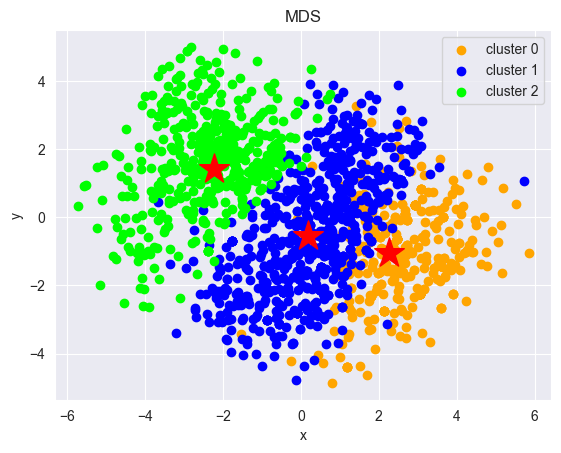

In [194]:
clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:],
                       title='MDS')

In [195]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


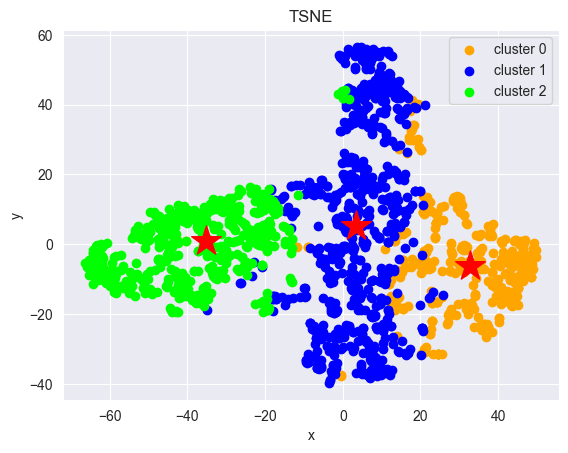

In [196]:
clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:],
                       title='TSNE')

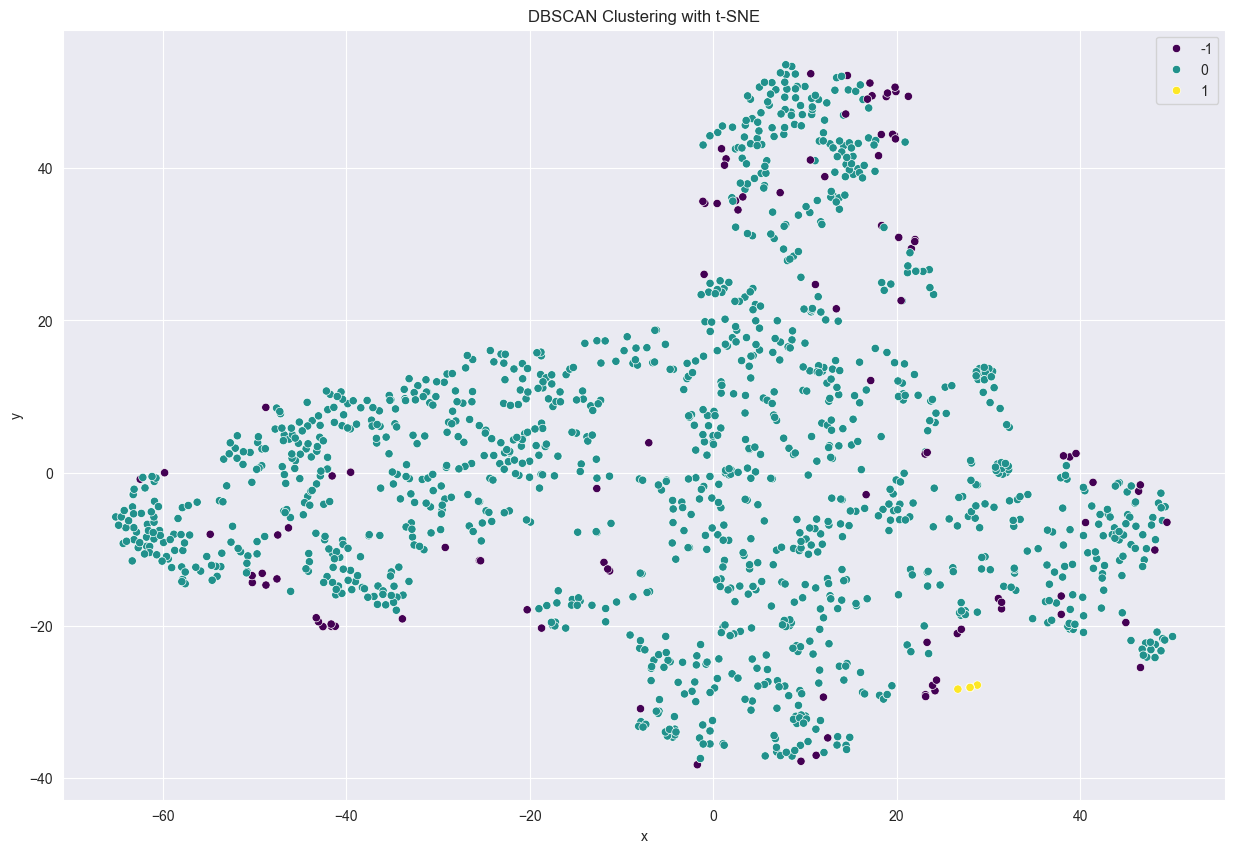

In [197]:
dbscan = DBSCAN(eps=1.4, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_transformed)

dataset_dbscan = dataset.copy()
dataset_dbscan["DBSCAN_Cluster"] = dbscan_labels

tsne = manifold.TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne = tsne.fit_transform(X_transformed)

plt.figure(figsize=(15, 10))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=dbscan_labels, palette="viridis", legend="full")
plt.title("DBSCAN Clustering with t-SNE")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Cluster Analysis

In [198]:
X_transformed = pd.DataFrame(X_transformed, columns=feature_names)
X_transformed['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=X_transformed.index)

In [199]:
X_transformed.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.566079,-1.396016,0.723111,-0.505773,0.088478,-0.200147,-0.040956,-0.040064,0.670992,1
1,0.416004,-0.622156,0.750129,0.528692,-0.149840,-0.322828,-1.319502,-0.087957,0.988402,1
2,1.287406,-1.091002,0.008079,-0.128282,0.826326,-0.851642,0.543844,0.460890,-0.422825,1
3,1.001780,0.664879,-0.440220,0.103357,0.838101,-1.834537,0.393058,1.143087,-0.490352,1
4,0.687107,-0.720889,-0.463440,-0.366185,1.095373,-1.657256,0.493833,1.606015,-0.106781,1


#### Computing mean value of each attribute for each cluster

In [200]:
X_transformed.groupby('cluster').mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,0.928948,-0.347321,-0.542252,1.339891,0.629970,0.595709,-0.883259,-0.803609,-0.487345
1,0.260149,-0.622059,-0.471980,-0.370398,0.588153,0.021857,0.276718,0.235491,0.101397
2,-1.114559,1.195332,1.125554,-0.501350,-1.366713,-0.499651,0.282196,0.280893,0.231792


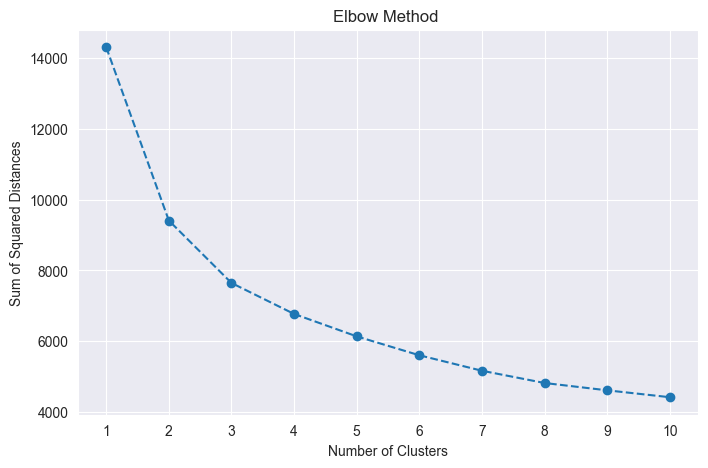

In [201]:
k_values = range(1, 11)
squared_sum = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_transformed)
    squared_sum.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, squared_sum, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method ")
plt.xticks(k_values)
plt.show()

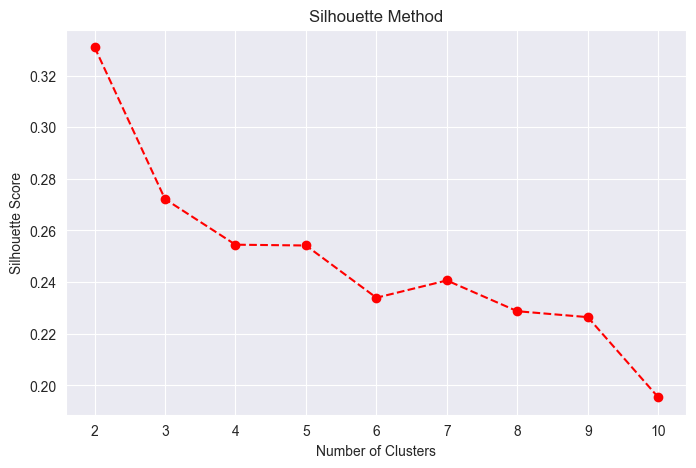

In [202]:
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_transformed)
    score = silhouette_score(X_transformed, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker="o", linestyle="--", color="r")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.xticks(k_values)
plt.show()

## Classification

Let m be the median of column popularity. Replace column popularity with a binary column popularity_binary with two values: 0 for popularity ≤ m and 1 for popularity > m. Attempt at least three different classification algorithms for training models that can be used for predicting the value of popularity_binary. Construct a pipeline for each of the algorithms you have chosen. Evaluate the trained models and select the best model. Explain your choice in a markdown cell. Aim at training a model that is as good as possible. In this process, you may attempt various data preparation and possibly dimensionality reduction strategies.